In [1]:
import os
import pandas as pd
import numpy as np
from scipy.stats import zscore

In [2]:
# Load dataset (replace 'filename.csv' with the actual file name)
data = pd.read_csv('data.csv', parse_dates=['Date'], index_col='Date')  # Replace with actual file name
print("Dataset loaded successfully!")
print(data.head())

Dataset loaded successfully!
                A       B       C      D      E      F      G
Date                                                         
2008-03-18  24.68  164.93  114.73  26.27  19.21  28.87  63.44
2008-03-19  24.18  164.89  114.75  26.22  19.07  27.76  59.98
2008-03-20  23.99  164.63  115.04  25.78  19.01  27.04  59.61
2008-03-25  24.14  163.92  114.85  27.41  19.61  27.84  59.41
2008-03-26  24.44  163.45  114.84  26.86  19.53  28.02  60.09


In [3]:
# Display column names
print(f"Columns in the dataset: {data.columns}")

Columns in the dataset: Index(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype='object')


In [4]:
# Handle missing values
data_filled = data.fillna(method='ffill')  # Forward-fill missing values
print("Missing values handled.")

Missing values handled.


<ipython-input-4-8efbe44f929f>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_filled = data.fillna(method='ffill')  # Forward-fill missing values


In [5]:
# Remove duplicates
data_cleaned = data_filled.drop_duplicates()
print("Duplicates removed.")

Duplicates removed.


In [6]:
# Handle outliers for each column
for column in data_cleaned.columns:
    if data_cleaned[column].dtype in [np.float64, np.int64]:
        z_scores = zscore(data_cleaned[column])
        outliers = abs(z_scores) > 3  # Identify outliers
        data_cleaned.loc[outliers, column] = data_cleaned[column].median()
print("Outliers handled.")

Outliers handled.


In [7]:
# Normalize each column
normalized_data = (data_cleaned - data_cleaned.min()) / (data_cleaned.max() - data_cleaned.min())
print("Data normalized.")

Data normalized.


In [8]:
# Print sample of cleaned and normalized data
print(data_cleaned.head())
print(normalized_data.head())

                A       B       C      D      E      F      G
Date                                                         
2008-03-18  24.68  164.93  114.73  26.27  19.21  28.87  63.44
2008-03-19  24.18  164.89  114.75  26.22  19.07  27.76  59.98
2008-03-20  23.99  164.63  115.04  25.78  19.01  27.04  59.61
2008-03-25  24.14  163.92  114.85  27.41  19.61  27.84  59.41
2008-03-26  24.44  163.45  114.84  26.86  19.53  28.02  60.09
                   A         B         C         D         E         F  \
Date                                                                     
2008-03-18  1.000000  1.000000  0.000000  0.200820  0.141844  0.740891   
2008-03-19  0.425287  0.976608  0.020202  0.180328  0.042553  0.291498   
2008-03-20  0.206897  0.824561  0.313131  0.000000  0.000000  0.000000   
2008-03-25  0.379310  0.409357  0.121212  0.668033  0.425532  0.323887   
2008-03-26  0.724138  0.134503  0.111111  0.442623  0.368794  0.396761   

                   G  
Date                  
2

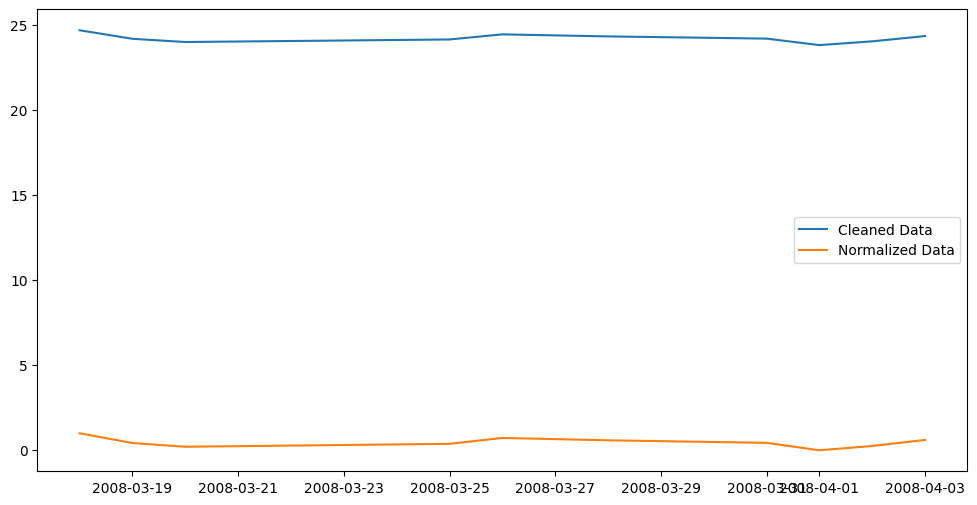

In [9]:
#Visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(data_cleaned.index, data_cleaned.iloc[:, 0], label='Cleaned Data')
plt.plot(normalized_data.index, normalized_data.iloc[:, 0], label='Normalized Data')
plt.legend()
plt.show()